# Session #4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()
np.random.seed(0)

# Problem 1.1
- Company X has developed a gadget to do a medical test.
- It claims that it returns correct results 50% of the time.
- To test the claim, you decide to do a survey.
- You ask $100$ people to take a test with a doctor and with the gadget.
- You have this data in a `csv` file.
- Propose the null and alternate hypothesis.
- Based on the p-value, comment on the company's claim.
- Use $\alpha=0.05$

In [2]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

ALPHA = 0.05

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Armagaan/"
                "Data-Analytics-with-Python/main/week-4/gadget.csv",
                header=0)
df.head()

,doctor,test
0,1,1
1,1,1
2,1,1
3,1,0
4,0,0


In [4]:
df["correct"] = df.doctor == df.test
df.head()

,doctor,test,correct
0,1,1,True
1,1,1,True
2,1,1,True
3,1,0,False
4,0,0,True


In [5]:
df.correct.sum() / len(df)

0.95

In [6]:
z_score, p_value = proportions_ztest(
    count = df.correct.sum(),
    nobs = len(df),
    value = 0.99,
    alternative="smaller",
)

print(z_score, p_value)

-1.835325870964495 0.03322871000846552


In [7]:
if p_value < ALPHA:
    print("Reject the null hypothesis in favor of the alternate.")
else:
    print("We can't reject the null hypothesis")

Reject the null hypothesis in favor of the alternate.


# Problem 1.2
Repeat problem 1.1 without using the library function.

$$Z = \frac{\mu_s - \mu}{\sqrt{\frac{P_0 (1 - P_0)}{N}}}$$

In [8]:
mean_sample = df.correct.mean()
mean_pop = 0.99

p0 = df.correct.mean()

numerator = mean_sample - mean_pop
denominator = np.sqrt(p0 * (1 - p0) / len(df))

z_score_man = numerator / denominator

print(z_score, z_score_man)

-1.835325870964495 -1.835325870964495


In [9]:
p_value_man = stats.norm(loc=0, scale=1).cdf(z_score)
print(p_value_man)

0.03322871000846552


In [10]:
if p_value < ALPHA:
    print("Reject the null hypothesis in favor of the alternate.")
else:
    print("We can't reject the null hypothesis")

Reject the null hypothesis in favor of the alternate.


# Problem 1.3
Visualize p-value

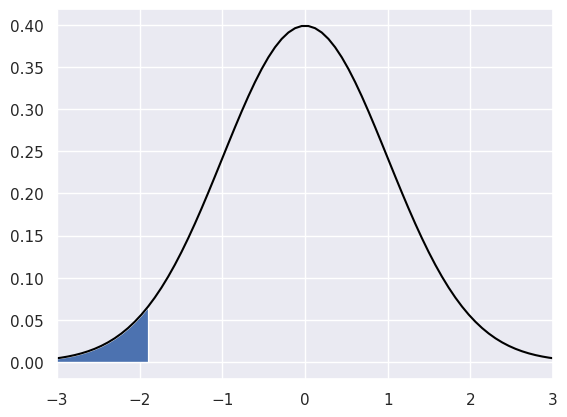

In [11]:
x = np.linspace(-4, 4, 100)
y = stats.norm(loc=0, scale=1).pdf(x)

plt.plot(x, y, color="black")
plt.fill_between(x, y, where = (x < z_score))
plt.xlim(-3, 3)
plt.show()

### Extra: Critical method

In [12]:
critical_point = stats.norm(loc=0, scale=1).ppf(ALPHA)
print(f"Critical point: {critical_point}")

Critical point: -1.6448536269514729


# Problem 2
- A travel blogger Y has a blog webpage.
- Over time, she has learned that, on average, people spend $20$ minutes ($\sigma=5$) on her page.
- She (obviously) wants to increase this.
- She blames the white background on her page for this.
- She replaces it with black.
- She waits a week and collects $1000$ samples.
- We have this data in a `csv` file.
- Come up with the hypothesis. Comment on her intuition.
- $\alpha = 0.05, \sigma = 5$

In [13]:
ALPHA = 0.05
MEAN_POP = 20
SIGMA_POP = 5

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/Armagaan/"
                "Data-Analytics-with-Python/main/week-4/time.csv",
                header=0)
df.head()

,time
0,30.63
1,19.60
2,19.26
3,22.81
4,22.51


In [15]:
# Covert to a numpy array as it is just one column.
time = df.time.values

In [16]:
print(f"Mean viewership of the sample: {time.mean()}")

Mean viewership of the sample: 24.72594


In [17]:
# z-score
z_score = (time.mean() - MEAN_POP) / SIGMA_POP
print(f"Z-score: {z_score}")

Z-score: 0.9451880000000003


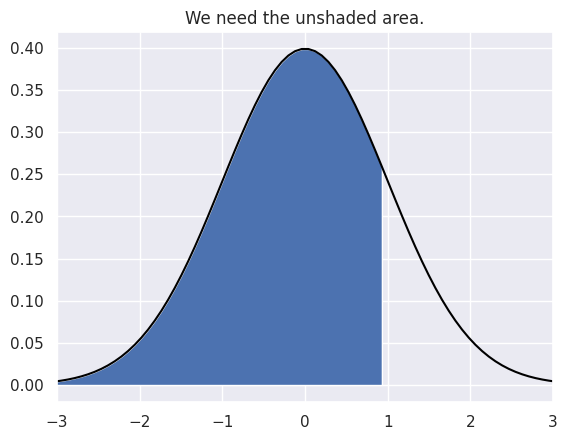

In [18]:
x = np.linspace(-4, 4, 100)
y = stats.norm(loc=0, scale=1).pdf(x)

plt.plot(x, y, color="black")
plt.fill_between(x, y, where = (x < z_score))
plt.title("We need the unshaded area.")
plt.xlim(-3, 3)
plt.show()

In [19]:
# The unshaded area is the p-value.
p_value = 1 - stats.norm(loc=0, scale=1).cdf(z_score)
print(f"P-value: {p_value}")

P-value: 0.17228145235868886


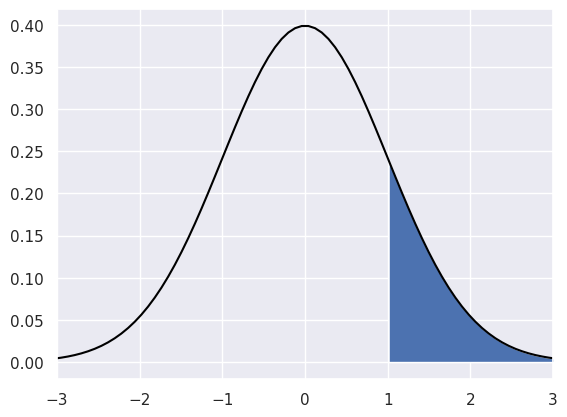

In [20]:
x = np.linspace(-4, 4, 100)
y = stats.norm(loc=0, scale=1).pdf(x)

plt.plot(x, y, color="black")
plt.fill_between(x, y, where = (x > z_score))
plt.xlim(-3, 3)
plt.show()

In [21]:
if p_value < ALPHA:
    print("Reject the null hypothesis in favor of the alternate.")
else:
    print("We can't reject the null hypothesis.")

We can't reject the null hypothesis
